# The Battle of the Neighborhoods

In [1]:
import pandas as pd
import numpy as np
import json
from geopy.geocoders import Nominatim
import requests
from pandas.io.json import json_normalize
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
import folium
import string

In [2]:
df=pd.read_excel('book1.xlsx')
df.head()

,Name,Description,Coordinates
0,RUE DE LA FERME,ROND-POINT MARTIN LUTHER KING - 77258,"48.8359484574, 2.62990289517"
1,COLLEGE LE LUZARD,COURS DES ROCHES - 77337,"48.8467902961, 2.61369101"
2,ZONE TECHNIQUE,ROUTE DES ANNIVERSAIRES - 95527,"49.0119496186, 2.5332905562"
3,ENTRETIEN NORD,ROUTE DE L'ARPENTEUR - 95527,"49.0114652199, 2.51552950645"
4,AVRON,63 BOULEVARD ALSACE-LORRAINE - 94058,"48.8500655011, 2.49939528589"


In [3]:
df['Description']=df['Description'].apply(lambda x:list(x.split('-'))[1])

In [4]:
df['Latitude']=df['Coordinates'].apply(lambda x:list(x.split(','))[0])

In [5]:
df['Longitude']=df['Coordinates'].apply(lambda x:list(x.split(','))[1])
df

,Name,Description,Coordinates,Latitude,Longitude
0,RUE DE LA FERME,POINT MARTIN LUTHER KING,"48.8359484574, 2.62990289517",48.8359484574,2.62990289517
1,COLLEGE LE LUZARD,77337,"48.8467902961, 2.61369101",48.8467902961,2.61369101
2,ZONE TECHNIQUE,95527,"49.0119496186, 2.5332905562",49.0119496186,2.5332905562
3,ENTRETIEN NORD,95527,"49.0114652199, 2.51552950645",49.0114652199,2.51552950645
4,AVRON,LORRAINE,"48.8500655011, 2.49939528589",48.8500655011,2.49939528589
...,...,...,...,...,...
25333,BOULEVARD DE LA SEINE.,92050,"48.9033027924, 2.19339213468",48.9033027924,2.19339213468
25334,BERTHELOT - CARRE VERT,92062,"48.8891783882, 2.23088294789",48.8891783882,2.23088294789
25335,FONTENAY-AUX-ROSES RER,92032,"48.7882424652, 2.29326524827",48.7882424652,2.29326524827
25336,LES BLAGIS,92032,"48.7857019409, 2.30251642637",48.7857019409,2.30251642637


In [6]:
df.drop('Coordinates', axis=1, inplace=True)

In [7]:
df

,Name,Description,Latitude,Longitude
0,RUE DE LA FERME,POINT MARTIN LUTHER KING,48.8359484574,2.62990289517
1,COLLEGE LE LUZARD,77337,48.8467902961,2.61369101
2,ZONE TECHNIQUE,95527,49.0119496186,2.5332905562
3,ENTRETIEN NORD,95527,49.0114652199,2.51552950645
4,AVRON,LORRAINE,48.8500655011,2.49939528589
...,...,...,...,...
25333,BOULEVARD DE LA SEINE.,92050,48.9033027924,2.19339213468
25334,BERTHELOT - CARRE VERT,92062,48.8891783882,2.23088294789
25335,FONTENAY-AUX-ROSES RER,92032,48.7882424652,2.29326524827
25336,LES BLAGIS,92032,48.7857019409,2.30251642637


In [8]:
df['Description']=df['Description'].apply(lambda x:x.lstrip())

In [9]:
df['Description']=df['Description'].apply(lambda x:x[:2])
df

,Name,Description,Latitude,Longitude
0,RUE DE LA FERME,PO,48.8359484574,2.62990289517
1,COLLEGE LE LUZARD,77,48.8467902961,2.61369101
2,ZONE TECHNIQUE,95,49.0119496186,2.5332905562
3,ENTRETIEN NORD,95,49.0114652199,2.51552950645
4,AVRON,LO,48.8500655011,2.49939528589
...,...,...,...,...
25333,BOULEVARD DE LA SEINE.,92,48.9033027924,2.19339213468
25334,BERTHELOT - CARRE VERT,92,48.8891783882,2.23088294789
25335,FONTENAY-AUX-ROSES RER,92,48.7882424652,2.29326524827
25336,LES BLAGIS,92,48.7857019409,2.30251642637


In [10]:
df=df[df['Description']=='75']

In [11]:
df

,Name,Description,Latitude,Longitude
16,CHATEAU DE VINCENNES,75,48.8442170813,2.44079723454
35,GERARD DE NERVAL,75,48.9007204012,2.33519629626
36,SIMPLON,75,48.8948064764,2.34715016514
38,GARE DE L'EST,75,48.8755903947,2.35801931852
42,DENFERT-ROCHEREAU - DAGUERRE,75,48.832254539,2.33088346418
...,...,...,...,...
25308,ROND-POINT DES CHAMPS-ELYSEES - MATIGNON,75,48.8696937901,2.31172416745
25311,SAINT-FRANCOIS-XAVIER,75,48.8518454423,2.31487890706
25316,BOSQUET - RAPP,75,48.8613780267,2.3021115835
25318,PORTE DE CHOISY,75,48.8197139072,2.36408082021


In [12]:
df.reset_index(drop=True, inplace=True)

In [13]:
df

,Name,Description,Latitude,Longitude
0,CHATEAU DE VINCENNES,75,48.8442170813,2.44079723454
1,GERARD DE NERVAL,75,48.9007204012,2.33519629626
2,SIMPLON,75,48.8948064764,2.34715016514
3,GARE DE L'EST,75,48.8755903947,2.35801931852
4,DENFERT-ROCHEREAU - DAGUERRE,75,48.832254539,2.33088346418
...,...,...,...,...
4831,ROND-POINT DES CHAMPS-ELYSEES - MATIGNON,75,48.8696937901,2.31172416745
4832,SAINT-FRANCOIS-XAVIER,75,48.8518454423,2.31487890706
4833,BOSQUET - RAPP,75,48.8613780267,2.3021115835
4834,PORTE DE CHOISY,75,48.8197139072,2.36408082021


In [14]:
df['Latitude']=df['Latitude'].astype('float')

/Users/asap/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [15]:
df['Longitude']=df['Longitude'].astype('float')

/Users/asap/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [16]:
type(df['Latitude'][1])

numpy.float64

In [17]:
df['Longitude']=df['Longitude'].apply(lambda x:round(x, 2))
df['Latitude']=df['Latitude'].apply(lambda x:round(x, 2))
df

/Users/asap/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/asap/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Name,Description,Latitude,Longitude
0,CHATEAU DE VINCENNES,75,48.84,2.44
1,GERARD DE NERVAL,75,48.90,2.34
2,SIMPLON,75,48.89,2.35
3,GARE DE L'EST,75,48.88,2.36
4,DENFERT-ROCHEREAU - DAGUERRE,75,48.83,2.33
...,...,...,...,...
4831,ROND-POINT DES CHAMPS-ELYSEES - MATIGNON,75,48.87,2.31
4832,SAINT-FRANCOIS-XAVIER,75,48.85,2.31
4833,BOSQUET - RAPP,75,48.86,2.30
4834,PORTE DE CHOISY,75,48.82,2.36


In [18]:
df['Name']=df['Name'].apply(lambda x:x.upper())

/Users/asap/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [19]:
df=df.groupby('Name').mean()

In [20]:
df = df.reset_index()

In [21]:
df

,Name,Latitude,Longitude
0,ABBE GEORGES HENOCQUE,48.82,2.35
1,ABBE GROULT,48.84,2.30
2,ABBESSES,48.88,2.34
3,ABEILLE,48.90,2.36
4,ABREUVOIR - GIRARDON,48.89,2.34
...,...,...,...
1135,WATT,48.83,2.38
1136,WILHEM,48.84,2.27
1137,WILHEM - VERSAILLES,48.85,2.27
1138,WILSON - COURCELLES,48.89,2.29


In [22]:
print(df['Latitude'].max())
print(df['Latitude'].min())
print(df['Longitude'].max())
print(df['Longitude'].min())

48.9
48.7
2.4600000000000004
2.23


In [23]:
df=df[(df['Latitude']<=48.88) & (df['Longitude']<=2.38)]
df=df[(df['Latitude']>=48.84) & (df['Longitude']>=2.30)]
df

,Name,Latitude,Longitude
1,ABBE GROULT,48.84,2.30
2,ABBESSES,48.88,2.34
18,ALIBERT,48.87,2.37
19,ALLERAY,48.84,2.31
20,ALLERAY-LA QUINTINIE,48.84,2.30
...,...,...,...
1128,VOLTAIRE - LEON BLUM,48.86,2.38
1130,WAGRAM,48.88,2.31
1132,WAGRAM - COURCELLES,48.88,2.30
1134,WAGRAM - PRONY,48.88,2.30


In [24]:
df = df.reset_index()

In [25]:
df=df.drop('index', axis=1)
df

,Name,Latitude,Longitude
0,ABBE GROULT,48.84,2.30
1,ABBESSES,48.88,2.34
2,ALIBERT,48.87,2.37
3,ALLERAY,48.84,2.31
4,ALLERAY-LA QUINTINIE,48.84,2.30
...,...,...,...
476,VOLTAIRE - LEON BLUM,48.86,2.38
477,WAGRAM,48.88,2.31
478,WAGRAM - COURCELLES,48.88,2.30
479,WAGRAM - PRONY,48.88,2.30


In [26]:
df=df.rename(columns={'Name':'Station'})
df

,Station,Latitude,Longitude
0,ABBE GROULT,48.84,2.30
1,ABBESSES,48.88,2.34
2,ALIBERT,48.87,2.37
3,ALLERAY,48.84,2.31
4,ALLERAY-LA QUINTINIE,48.84,2.30
...,...,...,...
476,VOLTAIRE - LEON BLUM,48.86,2.38
477,WAGRAM,48.88,2.31
478,WAGRAM - COURCELLES,48.88,2.30
479,WAGRAM - PRONY,48.88,2.30


In [27]:
address='Paris, France'

geolocator=Nominatim(user_agent='PAR_explore')

location=geolocator.geocode(address)
latitude=location.latitude
longitude=location.longitude

print('The geographical coordinate of Paris are {}, {}'.format(latitude, longitude))

The geographical coordinate of Paris are 48.8566969, 2.3514616


In [29]:
map_paris=folium.Map(location=[latitude,longitude], zoom_start=12)

for lat, lng, place_name in zip(df['Latitude'], df['Longitude'], df['Station']):
    label = '{}'.format(place_name)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_paris)  
    
map_paris

In [42]:
CLIENT_ID = '4VQNG4BW53CJPX02025UVK5HR2WMCSSS3FKNRVETL4YBZS41' # Foursquare ID
CLIENT_SECRET = 'R1QUFXO2OWCGTTT4NEIPINEUKEAQJDLDDJXVKRVADNRGVGF5' # Foursquare Secret
VERSION = '20200310' # Foursquare API version

print('Credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Credentails:
CLIENT_ID: 4VQNG4BW53CJPX02025UVK5HR2WMCSSS3FKNRVETL4YBZS41
CLIENT_SECRET:R1QUFXO2OWCGTTT4NEIPINEUKEAQJDLDDJXVKRVADNRGVGF5


In [43]:
df['Station'][0]

'ABBE GROULT'

In [44]:
station_latitude=df['Latitude'][0] 
station_longitude=df['Longitude'][0] 

station_name=df['Station'][0]
print('Latitude and longitude values of {} are {}, {}.'.format(station_name, 
                                                               station_latitude, 
                                                               station_longitude))

Latitude and longitude values of ABBE GROULT are 48.84000000000001, 2.3000000000000003.


In [45]:
LIMIT=50 # limit of number of venues 50
radius=150 # raidus of 150 meters
categoryId='4d4b7105d754a06374d81259'
url='https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&categoryId={}'.format(CLIENT_ID, CLIENT_SECRET, VERSION, station_latitude, station_longitude, radius, LIMIT,categoryId)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=4VQNG4BW53CJPX02025UVK5HR2WMCSSS3FKNRVETL4YBZS41&client_secret=R1QUFXO2OWCGTTT4NEIPINEUKEAQJDLDDJXVKRVADNRGVGF5&v=20200310&ll=48.84000000000001,2.3000000000000003&radius=150&limit=50&categoryId=4d4b7105d754a06374d81259'

In [46]:
results=requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5eac127629ce6a001b173111'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Saint-Lambert',
  'headerFullLocation': 'Saint-Lambert, Paris',
  'headerLocationGranularity': 'neighborhood',
  'query': 'food',
  'totalResults': 6,
  'suggestedBounds': {'ne': {'lat': 48.84135000135001,
    'lng': 2.3020473327505195},
   'sw': {'lat': 48.83864999865001, 'lng': 2.297952667249481}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4bcf545a046076b040196e71',
       'name': 'Je thé...me',
       'location': {'address': "4 rue d'Alleray",
        'lat': 48.838865920073,
        'lng': 2.3003746689898743,
        'labeledLatLngs': [{'label': 'display',
     

In [47]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [48]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues

/Users/asap/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


,name,categories,lat,lng
0,Je thé...me,French Restaurant,48.838866,2.300375
1,Les Vignes du Liban,Lebanese Restaurant,48.839402,2.300697
2,L'Inattendu,French Restaurant,48.840485,2.299322
3,Le Cap,French Restaurant,48.840937,2.300072
4,Le Quartier du Pain,Bakery,48.839282,2.300139
5,Le Commerce,Bistro,48.839109,2.300315


In [49]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

6 venues were returned by Foursquare.


In [50]:
def getNearbyVenues(names, latitudes, longitudes, radius=150):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&categoryId={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT,
            categoryId)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Station', 
                  'Station Latitude', 
                  'Station Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [51]:
paris_venues = getNearbyVenues(names=df['Station'],
                               latitudes=df['Latitude'], 
                               longitudes=df['Longitude'],
                               )

ABBE GROULT
ABBESSES
ALIBERT
ALLERAY
ALLERAY-LA QUINTINIE
ALMA - MARCEAU
ALMA-MARCEAU
ANJOU - CHAUVEAU LAGARDE
ANVERS
ANVERS - SACRE COEUR
ARCHIVES - HAUDRIETTES
ARCHIVES - RAMBUTEAU
ARMAND CARREL - MAIRIE DU 19E
ARMORIQUE - MUSEE POSTAL
ARMORIQUE-PASTEUR
ARTS ET METIERS
ARTS-ET-MÉTIERS
ASSAS - DUGUAY TROUIN
ASSEMBLEE NATIONALE
ATLAS
AUBER
AVENUE EMILE-ZOLA
AVENUE RICHERAND
BAC - BABYLONE
BAC - SAINT-PLACIDE
BALZAC
BARBES - ROCHECHOUART
BARBÈS-ROCHECHOUART
BASFROI
BASSANO
BASTILLE
BASTILLE - BEAUMARCHAIS
BASTILLE - RUE SAINT-ANTOINE
BEAUMARCHAIS
BEAUVAU
BELLEVILLE
BELLEVILLE - MENILMONTANT
BERTHOLLET - VAUQUELIN
BIBLIOTHEQUE NATIONALE
BLANCHE
BOLIVAR
BONNE NOUVELLE
BOSQUET - GRENELLE
BOSQUET - RAPP
BOSQUET - SAINT-DOMINIQUE
BOTZARIS - BUTTES CHAUMONT
BOULEVARD DES BATIGNOLLES
BOURGOGNE
BOURSE
BREGUET - SABIN
BRETAGNE
BRETEUIL
BRÉGUET-SABIN
BUCAREST
BUFFON - JARDIN DES PLANTES
BUFFON - LA MOSQUEE
BUTTES-CHAUMONT
CADET
CAMBRONNE
CAMBRONNE - LECOURBE
CAMBRONNE - VAUGIRARD
CAMPAGNE PREMIER

SAINT-PIERRE DU GROS CAILLOU
SAINT-PLACIDE
SAINT-SULPICE
SAINT-SÉBASTIEN-FROISSART
SAMBRE ET MEUSE
SEBASTOPOL - ETIENNE MARCEL
SECRETAN - BUTTES CHAUMONT
SEINE - BUCI
SENAT
SENTIER
SEVRES - BABYLONE
SEVRES - LECOURBE
SOLFERINO - BELLECHASSE
SOLFÉRINO
SQUARE DU TEMPLE - MAIRIE DU 3E - CARREAU DU TEMPLE
SQUARE DU TEMPLE - MAIRIE DU 3EME - CARREAU DU TEMPLE
SQUARE MONTHOLON
STALINGRAD
STRASBOURG - SAINT-DENIS
SULLY - MORLAND
SULLY-MORLAND
SÈVRES-BABYLONE
TEMPLE
TERNES
TOURNELLES - SAINT-GILLES
TRINITE
TRINITÉ-D'ESTIENNE D'ORVES
TRUDAINE
TUILERIES
TURBIGO - ETIENNE MARCEL
TURBIGO - REPUBLIQUE
TURENNE - SAINT-GILLES
TURIN - BATIGNOLLES
UNIVERSITE PARIS VI
VAN GOGH
VANEAU
VANEAU - BABYLONE
VANEAU - SAINT-ROMAIN
VARENNE
VARENNE - RASPAIL
VAUBAN - HOTEL DES INVALIDES
VAUGIRARD
VAUGIRARD (ADOLPHE CHÉRIOUX)
VAVIN
VICTOIRES
VICTOR CONSIDERANT
VILLIERS
VINCENT AURIOL
VOLONTAIRES
VOLONTAIRES - LECOURBE
VOLTAIRE (LÉON BLUM)
VOLTAIRE - LEON BLUM
WAGRAM
WAGRAM - COURCELLES
WAGRAM - PRONY
YVONNE LE TAC

In [52]:
paris_venues.shape

(3861, 7)

In [53]:
paris_venues['Station'].value_counts()

ROND-POINT DES CHAMPS-ELYSEES - MATIGNON    23
MATIGNON - SAINT-HONORE                     23
LA BOETIE - PERCIER                         23
MADELEINE                                   23
FRANKLIN-ROOSEVELT                          23
                                            ..
LAUMIÈRE                                     1
ATLAS                                        1
JAURÈS                                       1
COLONEL FABIEN                               1
BOTZARIS - BUTTES CHAUMONT                   1
Name: Station, Length: 462, dtype: int64

In [54]:
paris_venues

,Station,Station Latitude,Station Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,ABBE GROULT,48.84,2.30,Je thé...me,48.838866,2.300375,French Restaurant
1,ABBE GROULT,48.84,2.30,Les Vignes du Liban,48.839402,2.300697,Lebanese Restaurant
2,ABBE GROULT,48.84,2.30,L'Inattendu,48.840485,2.299322,French Restaurant
3,ABBE GROULT,48.84,2.30,Le Cap,48.840937,2.300072,French Restaurant
4,ABBE GROULT,48.84,2.30,Le Quartier du Pain,48.839282,2.300139,Bakery
...,...,...,...,...,...,...,...
3856,YVONNE LE TAC,48.88,2.34,Le Clou,48.880905,2.340473,French Restaurant
3857,YVONNE LE TAC,48.88,2.34,Sushi Shop,48.878660,2.339924,Sushi Restaurant
3858,YVONNE LE TAC,48.88,2.34,Le Pain Quotidien,48.880030,2.340560,Breakfast Spot
3859,YVONNE LE TAC,48.88,2.34,L'Oriental,48.880744,2.341271,Moroccan Restaurant


In [103]:
paris_venues=paris_venues.drop_duplicates(subset=['Venue', 'Venue Latitude', 'Venue Longitude'], keep='first')

In [104]:
paris_venues

,Station,Station Latitude,Station Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,ABBE GROULT,48.84,2.300,Je thé...me,48.838866,2.300375,French Restaurant
1,ABBE GROULT,48.84,2.300,Les Vignes du Liban,48.839402,2.300697,Lebanese Restaurant
2,ABBE GROULT,48.84,2.300,L'Inattendu,48.840485,2.299322,French Restaurant
3,ABBE GROULT,48.84,2.300,Le Cap,48.840937,2.300072,French Restaurant
4,ABBE GROULT,48.84,2.300,Le Quartier du Pain,48.839282,2.300139,Bakery
...,...,...,...,...,...,...,...
3816,VILLIERS,48.88,2.318,Le Coin,48.880446,2.317542,Café
3818,VILLIERS,48.88,2.318,Risi e Bisi,48.880246,2.317562,Italian Restaurant
3819,VILLIERS,48.88,2.318,Scus'y,48.880657,2.316948,Italian Restaurant
3820,VILLIERS,48.88,2.318,Maison Hecht,48.880460,2.317447,Bakery


In [105]:
print('There are {} uniques categories.'.format(len(paris_venues['Venue Category'].unique())))

There are 67 uniques categories.


In [106]:
# one hot encoding
paris_onehot = pd.get_dummies(paris_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
paris_onehot['Station'] = paris_venues['Station'] 

# move neighborhood column to the first column
fixed_columns = [paris_onehot.columns[-1]] + list(paris_onehot.columns[:-1])
paris_onehot = paris_onehot[fixed_columns]

paris_onehot.head()

,Station,African Restaurant,Alsatian Restaurant,American Restaurant,Asian Restaurant,Auvergne Restaurant,BBQ Joint,Bagel Shop,Bakery,Bistro,...,Souvlaki Shop,Spanish Restaurant,Steakhouse,Sushi Restaurant,Tapas Restaurant,Thai Restaurant,Turkish Restaurant,Udon Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
0,ABBE GROULT,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,ABBE GROULT,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,ABBE GROULT,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,ABBE GROULT,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,ABBE GROULT,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [107]:
paris_onehot.shape

(571, 68)

In [108]:
paris_grouped = paris_onehot.groupby('Station').mean().reset_index()
paris_grouped

,Station,African Restaurant,Alsatian Restaurant,American Restaurant,Asian Restaurant,Auvergne Restaurant,BBQ Joint,Bagel Shop,Bakery,Bistro,...,Souvlaki Shop,Spanish Restaurant,Steakhouse,Sushi Restaurant,Tapas Restaurant,Thai Restaurant,Turkish Restaurant,Udon Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
0,ABBE GROULT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.166667,0.166667,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000
1,ABBESSES,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.166667,0.000000,...,0.0,0.0,0.0,0.083333,0.0,0.000000,0.0,0.0,0.000000,0.000000
2,ALIBERT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.090909,0.090909
3,ALLERAY,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000
4,ALMA - MARCEAU,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,POPINCOURT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.333333,0.000000
69,RUE DE MEAUX,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.000000,1.0,0.0,0.000000,0.000000
70,SAINT-CLAUDE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.083333,...,0.0,0.0,0.0,0.000000,0.0,0.083333,0.0,0.0,0.166667,0.000000
71,SAINT-LAZARE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.083333,0.000000,...,0.0,0.0,0.0,0.083333,0.0,0.000000,0.0,0.0,0.000000,0.000000


In [109]:
paris_grouped.shape

(73, 68)

In [110]:
num_top_venues = 5

for hood in paris_grouped['Station']:
    print("----"+hood+"----")
    temp = paris_grouped[paris_grouped['Station'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----ABBE GROULT----
                     venue  freq
0        French Restaurant  0.50
1      Lebanese Restaurant  0.17
2                   Bakery  0.17
3                   Bistro  0.17
4  New American Restaurant  0.00


----ABBESSES----
                 venue  freq
0    French Restaurant  0.33
1       Breakfast Spot  0.17
2               Bakery  0.17
3             Creperie  0.08
4  Moroccan Restaurant  0.08


----ALIBERT----
                         venue  freq
0            French Restaurant  0.27
1        Vietnamese Restaurant  0.09
2          Japanese Restaurant  0.09
3                    Gastropub  0.09
4  Eastern European Restaurant  0.09


----ALLERAY----
                 venue  freq
0    French Restaurant  0.67
1   Italian Restaurant  0.33
2  Moroccan Restaurant  0.00
3     Ramen Restaurant  0.00
4           Poke Place  0.00


----ALMA - MARCEAU----
                venue  freq
0   French Restaurant  0.27
1           Brasserie  0.18
2  Seafood Restaurant  0.18
3                Caf

In [111]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [112]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Station']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
station_venues_sorted = pd.DataFrame(columns=columns)
station_venues_sorted['Station'] = paris_grouped['Station']

for ind in np.arange(paris_grouped.shape[0]):
    station_venues_sorted.iloc[ind, 1:] = return_most_common_venues(paris_grouped.iloc[ind, :], num_top_venues)

station_venues_sorted.head()

,Station,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,ABBE GROULT,French Restaurant,Bistro,Lebanese Restaurant,Bakery,Falafel Restaurant,Dim Sum Restaurant,Diner,Donut Shop,Eastern European Restaurant,Ethiopian Restaurant
1,ABBESSES,French Restaurant,Bakery,Breakfast Spot,Café,Sushi Restaurant,Moroccan Restaurant,Creperie,Eastern European Restaurant,Dim Sum Restaurant,Diner
2,ALIBERT,French Restaurant,Vietnamese Restaurant,Diner,Vegetarian / Vegan Restaurant,Italian Restaurant,Japanese Restaurant,Eastern European Restaurant,Restaurant,Gastropub,Bagel Shop
3,ALLERAY,French Restaurant,Italian Restaurant,Vietnamese Restaurant,Ethiopian Restaurant,Deli / Bodega,Dim Sum Restaurant,Diner,Donut Shop,Eastern European Restaurant,Fast Food Restaurant
4,ALMA - MARCEAU,French Restaurant,Seafood Restaurant,Brasserie,Café,Sandwich Place,Falafel Restaurant,Mediterranean Restaurant,Vietnamese Restaurant,Dim Sum Restaurant,Diner


In [126]:
# set number of clusters
kclusters = 5

paris_grouped_clustering = paris_grouped.drop('Station', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(paris_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 0, 0, 2, 0, 0, 1, 0, 2, 0], dtype=int32)

In [128]:
# add clustering labels
station_venues_sorted.insert(0, 'ClusterLabels', kmeans.labels_)

paris_merged = df

# merge paris_grouped with df to add latitude/longitude for each station
paris_merged = paris_merged.join(station_venues_sorted.set_index('Station'), on='Station')

paris_merged.head() # check the last columns!

,Station,Latitude,Longitude,ClusterLabels,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,ABBE GROULT,48.84,2.30,0.0,0.0,French Restaurant,Bistro,Lebanese Restaurant,Bakery,Falafel Restaurant,Dim Sum Restaurant,Diner,Donut Shop,Eastern European Restaurant,Ethiopian Restaurant
1,ABBESSES,48.88,2.34,0.0,0.0,French Restaurant,Bakery,Breakfast Spot,Café,Sushi Restaurant,Moroccan Restaurant,Creperie,Eastern European Restaurant,Dim Sum Restaurant,Diner
2,ALIBERT,48.87,2.37,0.0,0.0,French Restaurant,Vietnamese Restaurant,Diner,Vegetarian / Vegan Restaurant,Italian Restaurant,Japanese Restaurant,Eastern European Restaurant,Restaurant,Gastropub,Bagel Shop
3,ALLERAY,48.84,2.31,2.0,1.0,French Restaurant,Italian Restaurant,Vietnamese Restaurant,Ethiopian Restaurant,Deli / Bodega,Dim Sum Restaurant,Diner,Donut Shop,Eastern European Restaurant,Fast Food Restaurant
4,ALLERAY-LA QUINTINIE,48.84,2.30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [115]:
paris_merged.shape

(481, 14)

In [130]:
paris_merged.drop('Cluster Labels', axis=1, inplace=True)
paris_merged['ClusterLabels'].value_counts()

0.0    35
1.0    15
2.0    12
3.0     7
4.0     4
Name: ClusterLabels, dtype: int64

In [131]:
paris_merged=paris_merged.dropna()

In [132]:
paris_merged.shape

(73, 14)

In [134]:
paris_merged['ClusterLabels'] = paris_merged['ClusterLabels'].astype('int64')

/Users/asap/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [138]:
paris_merged

,Station,Latitude,Longitude,ClusterLabels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,ABBE GROULT,48.840000,2.300000,0,French Restaurant,Bistro,Lebanese Restaurant,Bakery,Falafel Restaurant,Dim Sum Restaurant,Diner,Donut Shop,Eastern European Restaurant,Ethiopian Restaurant
1,ABBESSES,48.880000,2.340000,0,French Restaurant,Bakery,Breakfast Spot,Café,Sushi Restaurant,Moroccan Restaurant,Creperie,Eastern European Restaurant,Dim Sum Restaurant,Diner
2,ALIBERT,48.870000,2.370000,0,French Restaurant,Vietnamese Restaurant,Diner,Vegetarian / Vegan Restaurant,Italian Restaurant,Japanese Restaurant,Eastern European Restaurant,Restaurant,Gastropub,Bagel Shop
3,ALLERAY,48.840000,2.310000,2,French Restaurant,Italian Restaurant,Vietnamese Restaurant,Ethiopian Restaurant,Deli / Bodega,Dim Sum Restaurant,Diner,Donut Shop,Eastern European Restaurant,Fast Food Restaurant
5,ALMA - MARCEAU,48.864444,2.300000,0,French Restaurant,Seafood Restaurant,Brasserie,Café,Sandwich Place,Falafel Restaurant,Mediterranean Restaurant,Vietnamese Restaurant,Dim Sum Restaurant,Diner
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,POPINCOURT,48.860000,2.375000,0,Restaurant,French Restaurant,Vegetarian / Vegan Restaurant,American Restaurant,Creperie,Greek Restaurant,Gastropub,Alsatian Restaurant,Food Truck,Fondue Restaurant
388,RUE DE MEAUX,48.880000,2.375000,1,Turkish Restaurant,Vietnamese Restaurant,Falafel Restaurant,Deli / Bodega,Dim Sum Restaurant,Diner,Donut Shop,Eastern European Restaurant,Ethiopian Restaurant,Fast Food Restaurant
401,SAINT-CLAUDE,48.860000,2.366667,1,Restaurant,Vegetarian / Vegan Restaurant,Pizza Place,Deli / Bodega,Café,Burger Joint,Brasserie,Bistro,Thai Restaurant,French Restaurant
414,SAINT-LAZARE,48.880000,2.327500,0,French Restaurant,Café,Bakery,Italian Restaurant,Creperie,Restaurant,Salad Place,Sandwich Place,Indian Restaurant,Sushi Restaurant


In [135]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(paris_merged['Latitude'], paris_merged['Longitude'], paris_merged['Station'], paris_merged['ClusterLabels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

# Cluster 0

In [144]:
cluster0=paris_merged.loc[paris_merged['ClusterLabels'] == 0, paris_merged.columns[[0] + list(range(4, paris_merged.shape[1]))]]
cluster0

,Station,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,ABBE GROULT,French Restaurant,Bistro,Lebanese Restaurant,Bakery,Falafel Restaurant,Dim Sum Restaurant,Diner,Donut Shop,Eastern European Restaurant,Ethiopian Restaurant
1,ABBESSES,French Restaurant,Bakery,Breakfast Spot,Café,Sushi Restaurant,Moroccan Restaurant,Creperie,Eastern European Restaurant,Dim Sum Restaurant,Diner
2,ALIBERT,French Restaurant,Vietnamese Restaurant,Diner,Vegetarian / Vegan Restaurant,Italian Restaurant,Japanese Restaurant,Eastern European Restaurant,Restaurant,Gastropub,Bagel Shop
5,ALMA - MARCEAU,French Restaurant,Seafood Restaurant,Brasserie,Café,Sandwich Place,Falafel Restaurant,Mediterranean Restaurant,Vietnamese Restaurant,Dim Sum Restaurant,Diner
6,ALMA-MARCEAU,French Restaurant,Italian Restaurant,Café,Bakery,Indian Restaurant,Asian Restaurant,Chinese Restaurant,Pizza Place,Vietnamese Restaurant,Eastern European Restaurant
10,ARCHIVES - HAUDRIETTES,French Restaurant,Creperie,Bistro,Pizza Place,Steakhouse,Deli / Bodega,Dim Sum Restaurant,Diner,Donut Shop,Eastern European Restaurant
13,ARMORIQUE - MUSEE POSTAL,French Restaurant,Sandwich Place,Italian Restaurant,Vietnamese Restaurant,Eastern European Restaurant,Deli / Bodega,Dim Sum Restaurant,Diner,Donut Shop,Falafel Restaurant
15,ARTS ET METIERS,French Restaurant,Ramen Restaurant,Breakfast Spot,Israeli Restaurant,Tapas Restaurant,Café,Middle Eastern Restaurant,Burger Joint,Scandinavian Restaurant,Dim Sum Restaurant
21,AVENUE EMILE-ZOLA,French Restaurant,Bakery,Creperie,Brasserie,Café,Spanish Restaurant,Dim Sum Restaurant,Diner,Donut Shop,Eastern European Restaurant
23,BAC - BABYLONE,Restaurant,French Restaurant,Italian Restaurant,Japanese Restaurant,Ethiopian Restaurant,Deli / Bodega,Dim Sum Restaurant,Diner,Donut Shop,Eastern European Restaurant


In [145]:
cluster0['1st Most Common Venue'].value_counts()

French Restaurant     28
Restaurant             3
Salad Place            1
Bistro                 1
Italian Restaurant     1
Indian Restaurant      1
Name: 1st Most Common Venue, dtype: int64

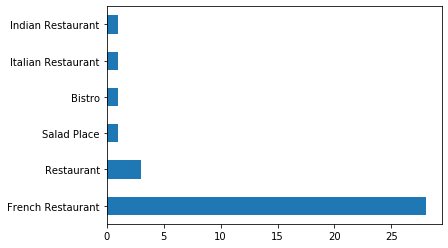

In [148]:
%matplotlib inline
cluster0['1st Most Common Venue'].value_counts().plot(kind='barh')

# Cluster 1

In [149]:
cluster1=paris_merged.loc[paris_merged['ClusterLabels'] == 1, paris_merged.columns[[0] + list(range(4, paris_merged.shape[1]))]]
cluster1

,Station,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7,ANJOU - CHAUVEAU LAGARDE,Café,Sushi Restaurant,Cafeteria,Salad Place,Sandwich Place,Spanish Restaurant,Pizza Place,Asian Restaurant,French Restaurant,Fast Food Restaurant
17,ASSAS - DUGUAY TROUIN,Pizza Place,Café,Sandwich Place,Bakery,Eastern European Restaurant,Deli / Bodega,Dim Sum Restaurant,Diner,Donut Shop,Vietnamese Restaurant
35,BELLEVILLE,Restaurant,BBQ Joint,Diner,Spanish Restaurant,Pizza Place,Fondue Restaurant,Food Truck,Fast Food Restaurant,French Restaurant,Corsican Restaurant
37,BERTHOLLET - VAUQUELIN,Café,Greek Restaurant,French Restaurant,Tapas Restaurant,Japanese Restaurant,Pizza Place,Moroccan Restaurant,Mexican Restaurant,Donut Shop,Deli / Bodega
40,BOLIVAR,Food Truck,Vietnamese Restaurant,Corsican Restaurant,Greek Restaurant,Gastropub,French Restaurant,Fondue Restaurant,Fast Food Restaurant,Falafel Restaurant,Ethiopian Restaurant
41,BONNE NOUVELLE,Vietnamese Restaurant,Bistro,Mediterranean Restaurant,Pizza Place,Poke Place,Burger Joint,Seafood Restaurant,Indian Restaurant,Turkish Restaurant,Bagel Shop
46,BOULEVARD DES BATIGNOLLES,Middle Eastern Restaurant,Restaurant,Thai Restaurant,Asian Restaurant,Italian Restaurant,Café,Korean Restaurant,Creperie,Vietnamese Restaurant,Dim Sum Restaurant
88,CHEMIN VERT,Asian Restaurant,Vietnamese Restaurant,Falafel Restaurant,Deli / Bodega,Dim Sum Restaurant,Diner,Donut Shop,Eastern European Restaurant,Ethiopian Restaurant,Fast Food Restaurant
107,COURCELLES,African Restaurant,Seafood Restaurant,Burger Joint,Indian Restaurant,Asian Restaurant,Auvergne Restaurant,Greek Restaurant,Gastropub,French Restaurant,Food Truck
116,ECOLE MILITAIRE,Spanish Restaurant,Falafel Restaurant,Deli / Bodega,Dim Sum Restaurant,Diner,Donut Shop,Eastern European Restaurant,Ethiopian Restaurant,Vietnamese Restaurant,Corsican Restaurant


In [150]:
cluster1['1st Most Common Venue'].value_counts()

Café                         2
Restaurant                   2
Asian Restaurant             2
Pizza Place                  1
Food Truck                   1
Vietnamese Restaurant        1
Spanish Restaurant           1
Bistro                       1
Creperie                     1
Turkish Restaurant           1
African Restaurant           1
Middle Eastern Restaurant    1
Name: 1st Most Common Venue, dtype: int64

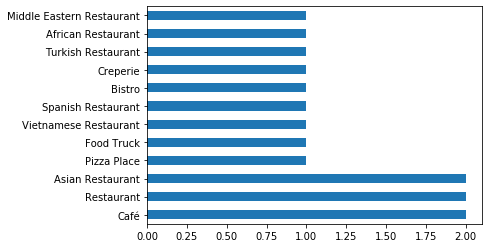

In [151]:
%matplotlib inline
cluster1['1st Most Common Venue'].value_counts().plot(kind='barh')

# Cluster 2

In [152]:
cluster2=paris_merged.loc[paris_merged['ClusterLabels'] == 2, paris_merged.columns[[0] + list(range(4, paris_merged.shape[1]))]]
cluster2

,Station,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,ALLERAY,French Restaurant,Italian Restaurant,Vietnamese Restaurant,Ethiopian Restaurant,Deli / Bodega,Dim Sum Restaurant,Diner,Donut Shop,Eastern European Restaurant,Fast Food Restaurant
12,ARMAND CARREL - MAIRIE DU 19E,French Restaurant,Vietnamese Restaurant,Corsican Restaurant,Greek Restaurant,Gastropub,Food Truck,Fondue Restaurant,Fast Food Restaurant,Falafel Restaurant,Ethiopian Restaurant
18,ASSEMBLEE NATIONALE,French Restaurant,Bistro,Italian Restaurant,Café,Falafel Restaurant,Dim Sum Restaurant,Diner,Donut Shop,Eastern European Restaurant,Ethiopian Restaurant
20,AUBER,French Restaurant,Restaurant,Breakfast Spot,Auvergne Restaurant,Salad Place,Bagel Shop,Café,Dim Sum Restaurant,Diner,Donut Shop
25,BALZAC,French Restaurant,Japanese Restaurant,Sandwich Place,Mediterranean Restaurant,Vietnamese Restaurant,Eastern European Restaurant,Deli / Bodega,Dim Sum Restaurant,Diner,Donut Shop
51,BRETEUIL,French Restaurant,Café,Vietnamese Restaurant,Ethiopian Restaurant,Deli / Bodega,Dim Sum Restaurant,Diner,Donut Shop,Eastern European Restaurant,Falafel Restaurant
161,GRAND PALAIS,French Restaurant,Café,Snack Place,Vietnamese Restaurant,Eastern European Restaurant,Deli / Bodega,Dim Sum Restaurant,Diner,Donut Shop,Ethiopian Restaurant
169,HAUSSMANN - COURCELLES,French Restaurant,Vietnamese Restaurant,Corsican Restaurant,Greek Restaurant,Gastropub,Food Truck,Fondue Restaurant,Fast Food Restaurant,Falafel Restaurant,Ethiopian Restaurant
170,HAUSSMANN - MIROMESNIL,Café,French Restaurant,Vietnamese Restaurant,Ethiopian Restaurant,Deli / Bodega,Dim Sum Restaurant,Diner,Donut Shop,Eastern European Restaurant,Falafel Restaurant
201,JOUFFROY D'ABBANS - VILLIERS,French Restaurant,Café,Vietnamese Restaurant,Ethiopian Restaurant,Deli / Bodega,Dim Sum Restaurant,Diner,Donut Shop,Eastern European Restaurant,Falafel Restaurant


In [153]:
cluster2['1st Most Common Venue'].value_counts()

French Restaurant    11
Café                  1
Name: 1st Most Common Venue, dtype: int64

In [164]:
cluster2[ '2nd Most Common Venue'].value_counts()

Café                     4
Vietnamese Restaurant    2
Restaurant               1
Italian Restaurant       1
Bistro                   1
French Restaurant        1
Japanese Restaurant      1
Bakery                   1
Name: 2nd Most Common Venue, dtype: int64

In [165]:
cluster2['3rd Most Common Venue'].value_counts()

Vietnamese Restaurant    5
Corsican Restaurant      2
Sandwich Place           1
Falafel Restaurant       1
Snack Place              1
Italian Restaurant       1
Breakfast Spot           1
Name: 3rd Most Common Venue, dtype: int64

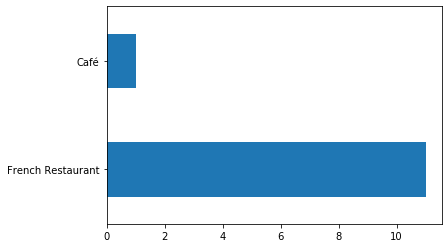

In [155]:
cluster2['1st Most Common Venue'].value_counts().plot(kind='barh')

# Cluster 3

In [156]:
cluster3=paris_merged.loc[paris_merged['ClusterLabels'] == 3, paris_merged.columns[[0] + list(range(4, paris_merged.shape[1]))]]
cluster3

,Station,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
28,BASFROI,Bistro,Italian Restaurant,Café,Ethiopian Restaurant,Falafel Restaurant,Dim Sum Restaurant,Diner,Donut Shop,Eastern European Restaurant,Vietnamese Restaurant
39,BLANCHE,Italian Restaurant,Bistro,Steakhouse,Indian Restaurant,Donut Shop,Pizza Place,Bagel Shop,Creperie,Fondue Restaurant,Fast Food Restaurant
82,CHATEAU LANDON,Italian Restaurant,Restaurant,Snack Place,Japanese Restaurant,Fast Food Restaurant,Burger Joint,Deli / Bodega,Dim Sum Restaurant,Diner,Donut Shop
95,CITE DE LA MODE ET DU DESIGN,Russian Restaurant,Italian Restaurant,Ethiopian Restaurant,Creperie,Deli / Bodega,Dim Sum Restaurant,Diner,Donut Shop,Eastern European Restaurant,Vietnamese Restaurant
123,ETIENNE MARCEL - MONTMARTRE,Italian Restaurant,Bakery,Ramen Restaurant,Souvlaki Shop,Peruvian Restaurant,Café,French Restaurant,Restaurant,Seafood Restaurant,Noodle House
148,GARE DE LYON.,Italian Restaurant,Vietnamese Restaurant,Falafel Restaurant,Deli / Bodega,Dim Sum Restaurant,Diner,Donut Shop,Eastern European Restaurant,Ethiopian Restaurant,Fast Food Restaurant
471,VILLIERS,Italian Restaurant,Bakery,Café,Vietnamese Restaurant,Falafel Restaurant,Dim Sum Restaurant,Diner,Donut Shop,Eastern European Restaurant,Ethiopian Restaurant


In [157]:
cluster3['1st Most Common Venue'].value_counts()

Italian Restaurant    5
Russian Restaurant    1
Bistro                1
Name: 1st Most Common Venue, dtype: int64

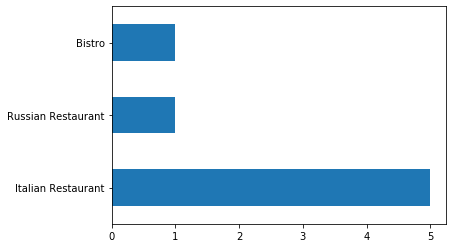

In [158]:
cluster3['1st Most Common Venue'].value_counts().plot(kind='barh')

# Cluster 4

In [159]:
cluster4=paris_merged.loc[paris_merged['ClusterLabels'] == 4, paris_merged.columns[[0] + list(range(4, paris_merged.shape[1]))]]
cluster4

,Station,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
63,CARDINAL LEMOINE,Bakery,Japanese Restaurant,Burger Joint,Seafood Restaurant,Mexican Restaurant,Vietnamese Restaurant,Ethiopian Restaurant,Dim Sum Restaurant,Diner,Donut Shop
70,CENTRE GEORGES POMPIDOU,Bakery,Falafel Restaurant,Deli / Bodega,Dim Sum Restaurant,Diner,Donut Shop,Eastern European Restaurant,Ethiopian Restaurant,Vietnamese Restaurant,Corsican Restaurant
139,GARE D'AUSTERLITZ,Corsican Restaurant,Korean Restaurant,Indian Restaurant,American Restaurant,Deli / Bodega,Greek Restaurant,Gastropub,French Restaurant,Alsatian Restaurant,Food Truck
149,GARE DU NORD,Indian Restaurant,Bakery,Greek Restaurant,Gastropub,French Restaurant,Food Truck,Fondue Restaurant,Fast Food Restaurant,Corsican Restaurant,Falafel Restaurant


In [160]:
cluster4['1st Most Common Venue'].value_counts()

Bakery                 2
Indian Restaurant      1
Corsican Restaurant    1
Name: 1st Most Common Venue, dtype: int64

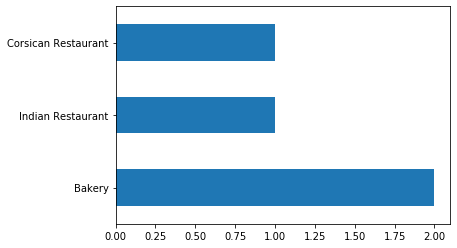

In [161]:
cluster4['1st Most Common Venue'].value_counts().plot(kind='barh')